## Activity 12: Missing Value Handling and Correlation Analysis with PySpark DataFrames

In [1]:
from pyspark import SparkContext
sc = SparkContext()

In [2]:
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [3]:
df = sqlc.read.format('com.databricks.spark.csv').options(header = 'true', inferschema = 'true').load('iris.csv')
df.show(5)


+-----------+----------+-----------+----------+-------+
|Sepallength|Sepalwidth|Petallength|Petalwidth|Species|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| setosa|
|        4.9|       3.0|        1.4|       0.2| setosa|
|        4.7|       3.2|        1.3|       0.2| setosa|
|        4.6|       3.1|        1.5|       0.2| setosa|
|        5.0|       3.6|        1.4|       0.2| setosa|
+-----------+----------+-----------+----------+-------+
only showing top 5 rows



In [4]:
from pyspark.sql.functions import mean
avg_sl = df.select(mean('Sepallength')).toPandas()['avg(Sepallength)']


In [5]:
y = df
y = y.na.fill(float(avg_sl),['Sepallength'])
y.describe().show(1)


+-------+-----------+----------+-----------+----------+-------+
|summary|Sepallength|Sepalwidth|Petallength|Petalwidth|Species|
+-------+-----------+----------+-----------+----------+-------+
|  count|        150|       150|        149|       150|    150|
+-------+-----------+----------+-----------+----------+-------+
only showing top 1 row



In [6]:
from pyspark.mllib.stat import Statistics
import pandas as pd


In [7]:
z = y.fillna(1)

In [8]:
a = z.drop('species') 
features = a.rdd.map(lambda row: row[0:])


In [9]:
correlation_matrix = Statistics.corr(features, method="pearson")

In [10]:
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df.index, correlation_df.columns = a.columns, a.columns
correlation_df


,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.120876,0.849430,0.765415
Sepalwidth,-0.120876,1.000000,-0.414944,-0.372994
Petallength,0.849430,-0.414944,1.000000,0.944018
Petalwidth,0.765415,-0.372994,0.944018,1.000000


In [11]:
import pandas as pd
dat = y.toPandas()
type(dat)


pandas.core.frame.DataFrame

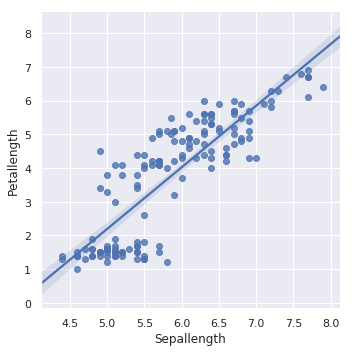

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
sns.lmplot(x = "Sepallength", y = "Petallength", data = dat)
plt.show()


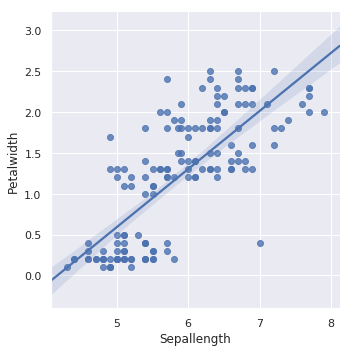

In [13]:
import seaborn as sns
sns.lmplot(x = "Sepallength", y = "Petalwidth", data = dat)
plt.show()


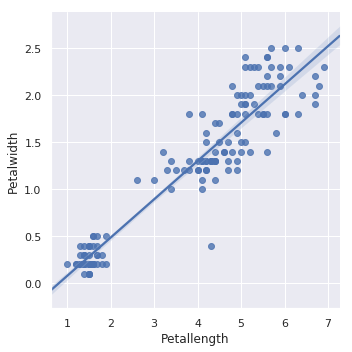

In [14]:
sns.lmplot(x = "Petallength", y = "Petalwidth", data = dat)
plt.show()
